# Crear un array de 5 elementos. Cada elemento es un template ERP completo y distintos entre ellos. Cada templateERP debe alterarse multiplicándolo por valores random entre 0.5ERP y 1.5ERP.

# El ejercicio que hice es crear un vector aleatorio vCoefERP = [0, 30] y llamarlo en la función cada vez que lo necesito coefERP = random.choice(vCoefERP).  
# La idea es hacer PREVIO a esto, lo mismo pero con un template ERP completo.

In [21]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  
import random

#color = ['green', 'blue','red','cyan', 'magenta', 'yellow','red','red']     # Paleta de colores para diferenciar las ondas
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Funciones DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            # Acá debe ir un random.choice que llame a los 5 distintos tipos de templates ERP. 
            # coefERP = random.choice(vCoefERP)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
    return signal

#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete(erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete(erptemplate2, range(0,256,43),0)
df_erptemplate1 = a_fun.to_df(erptemplate1)

#-----------------------------------------------------------------------
# Vector random entre 0.5*ERP y 1.5*ERP. | Uso temporalmente el fijo para darme cuenta.   
#-----------------------------------------------------------------------
v_min = erptemplate1.min()*0.5
v_max = erptemplate1.max()*1.5
v_aleatorio = np.random.uniform(v_min, v_max, (1, 8)) # B = np.random.rand(1, 8) Array B de dim (1, 8) con valores aleatorios
# v_aleatorio = [-5,1,5,0,5,0,5,0] # Vector fijo para testing
DrugAmpERPtemplate = np.empty_like(erptemplate1) # Inicializo un array igual que erptemplate1
for i in range(erptemplate1.shape[0]):
    DrugAmpERPtemplate[i, :] = erptemplate1[i, :] * v_aleatorio
df_DrugAmpERPtemplate = a_fun.to_df(DrugAmpERPtemplate)

ch_names=['Fz','Cz','P3','Pz','P4','PO7','PO8', 'Oz'] # Nombres de los canales

print(f'v_aleatorio: ',v_aleatorio)

v_aleatorio:  [[ 3.83141524  7.76657996 -0.01525719  8.42675561  0.73836962  0.77916406
   8.19217775  1.49556063]]


In [22]:
df_erptemplate1.head(5)

,0,1,2,3,4,5,6,7,sample
0,-1.020693,-0.586228,0.215272,0.297523,0.446650,-0.022604,1.090090,0.168238,0
1,-0.968875,-0.563106,0.173880,0.247861,0.401001,-0.041949,1.081391,0.135391,1
2,-0.913207,-0.535921,0.131500,0.193292,0.350855,-0.061824,1.064240,0.098018,2
3,-0.853245,-0.504147,0.089699,0.135484,0.297906,-0.081188,1.039851,0.057203,3
4,-0.788539,-0.467307,0.049984,0.076135,0.243860,-0.099118,1.009518,0.014067,4


In [23]:
df_DrugAmpERPtemplate.head(5)

,0,1,2,3,4,5,6,7,sample
0,-3.910697,-4.552989,-0.003284,2.507157,0.329793,-0.017612,8.930211,0.251610,0
1,-3.712164,-4.373405,-0.002653,2.088665,0.296087,-0.032685,8.858944,0.202486,1
2,-3.498874,-4.162271,-0.002006,1.628823,0.259060,-0.048171,8.718443,0.146592,2
3,-3.269136,-3.915501,-0.001369,1.141688,0.219964,-0.063259,8.518642,0.085550,3
4,-3.021221,-3.629379,-0.000763,0.641574,0.180059,-0.077229,8.270152,0.021038,4


In [24]:
df_DrugAmpERPtemplate.describe()

,0,1,2,3,4,5,6,7,sample
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.008270,0.002672,0.000035,-0.007216,-0.002734,-0.000670,-0.012946,0.000003,124.500000
std,9.052411,18.163607,0.029954,10.308703,1.331047,1.554817,17.140296,2.526414,72.312977
min,-10.392942,-23.137053,-0.069349,-20.802448,-1.702426,-2.244411,-34.800684,-5.067499,0.000000
25%,-5.870702,-13.880443,-0.005403,-5.448205,-1.107516,-0.963613,-9.150573,-1.357673,62.250000
50%,-2.235368,-3.612827,0.004891,-1.260302,-0.288471,-0.344667,1.365723,-0.285771,124.500000
75%,1.511560,4.899455,0.022605,5.372049,0.286830,0.191430,8.198483,1.458284,186.750000
max,23.973282,45.256451,0.039227,20.282461,3.021462,3.632183,31.017328,4.112488,249.000000


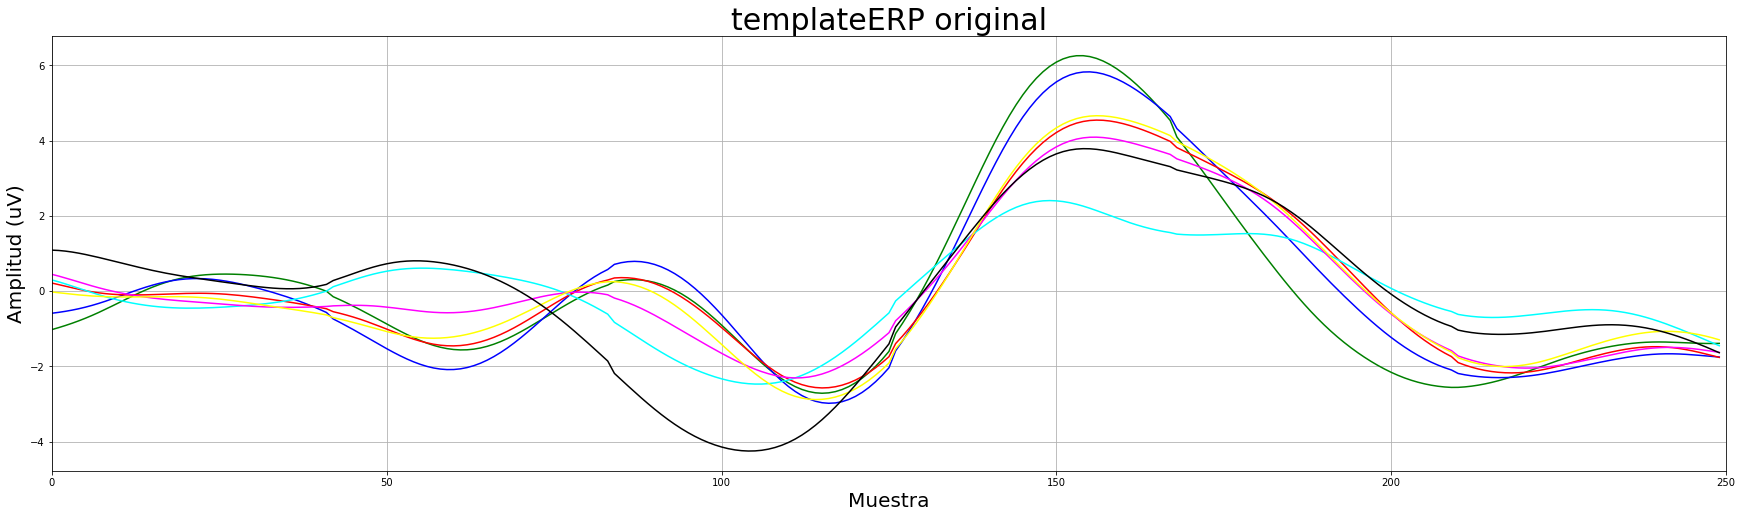

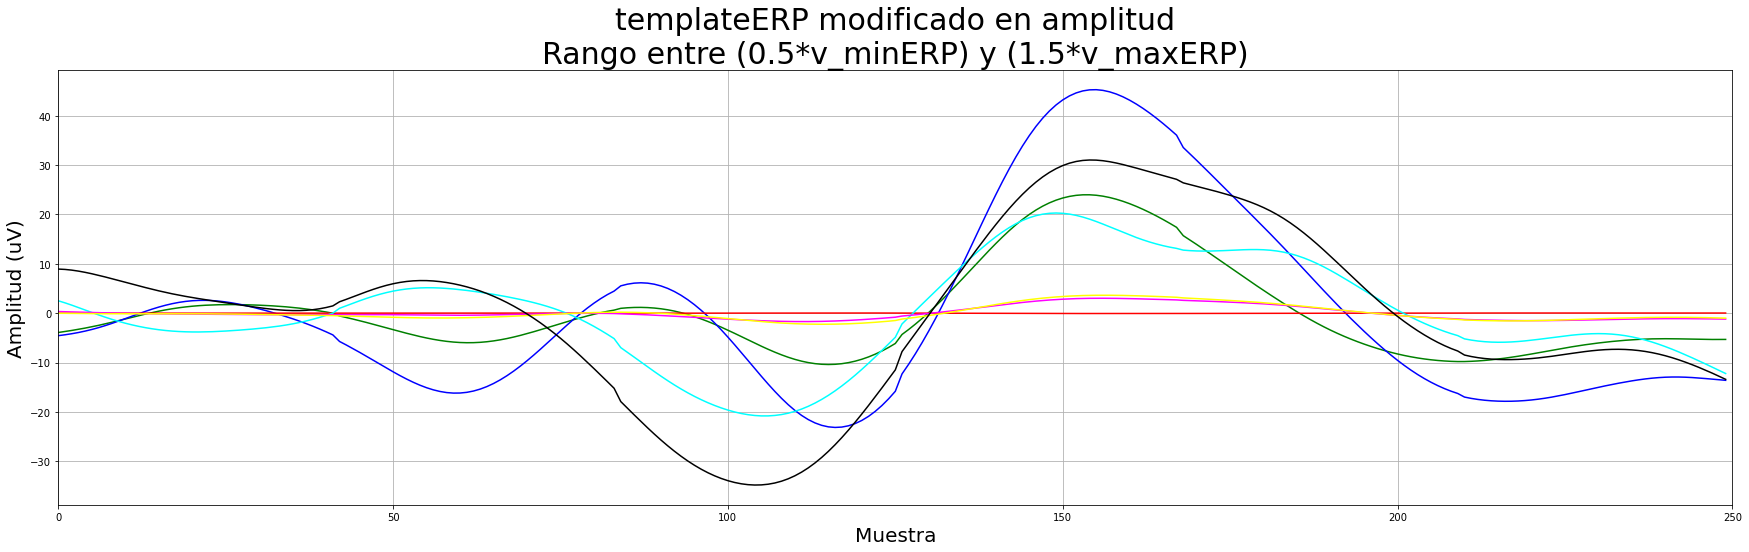

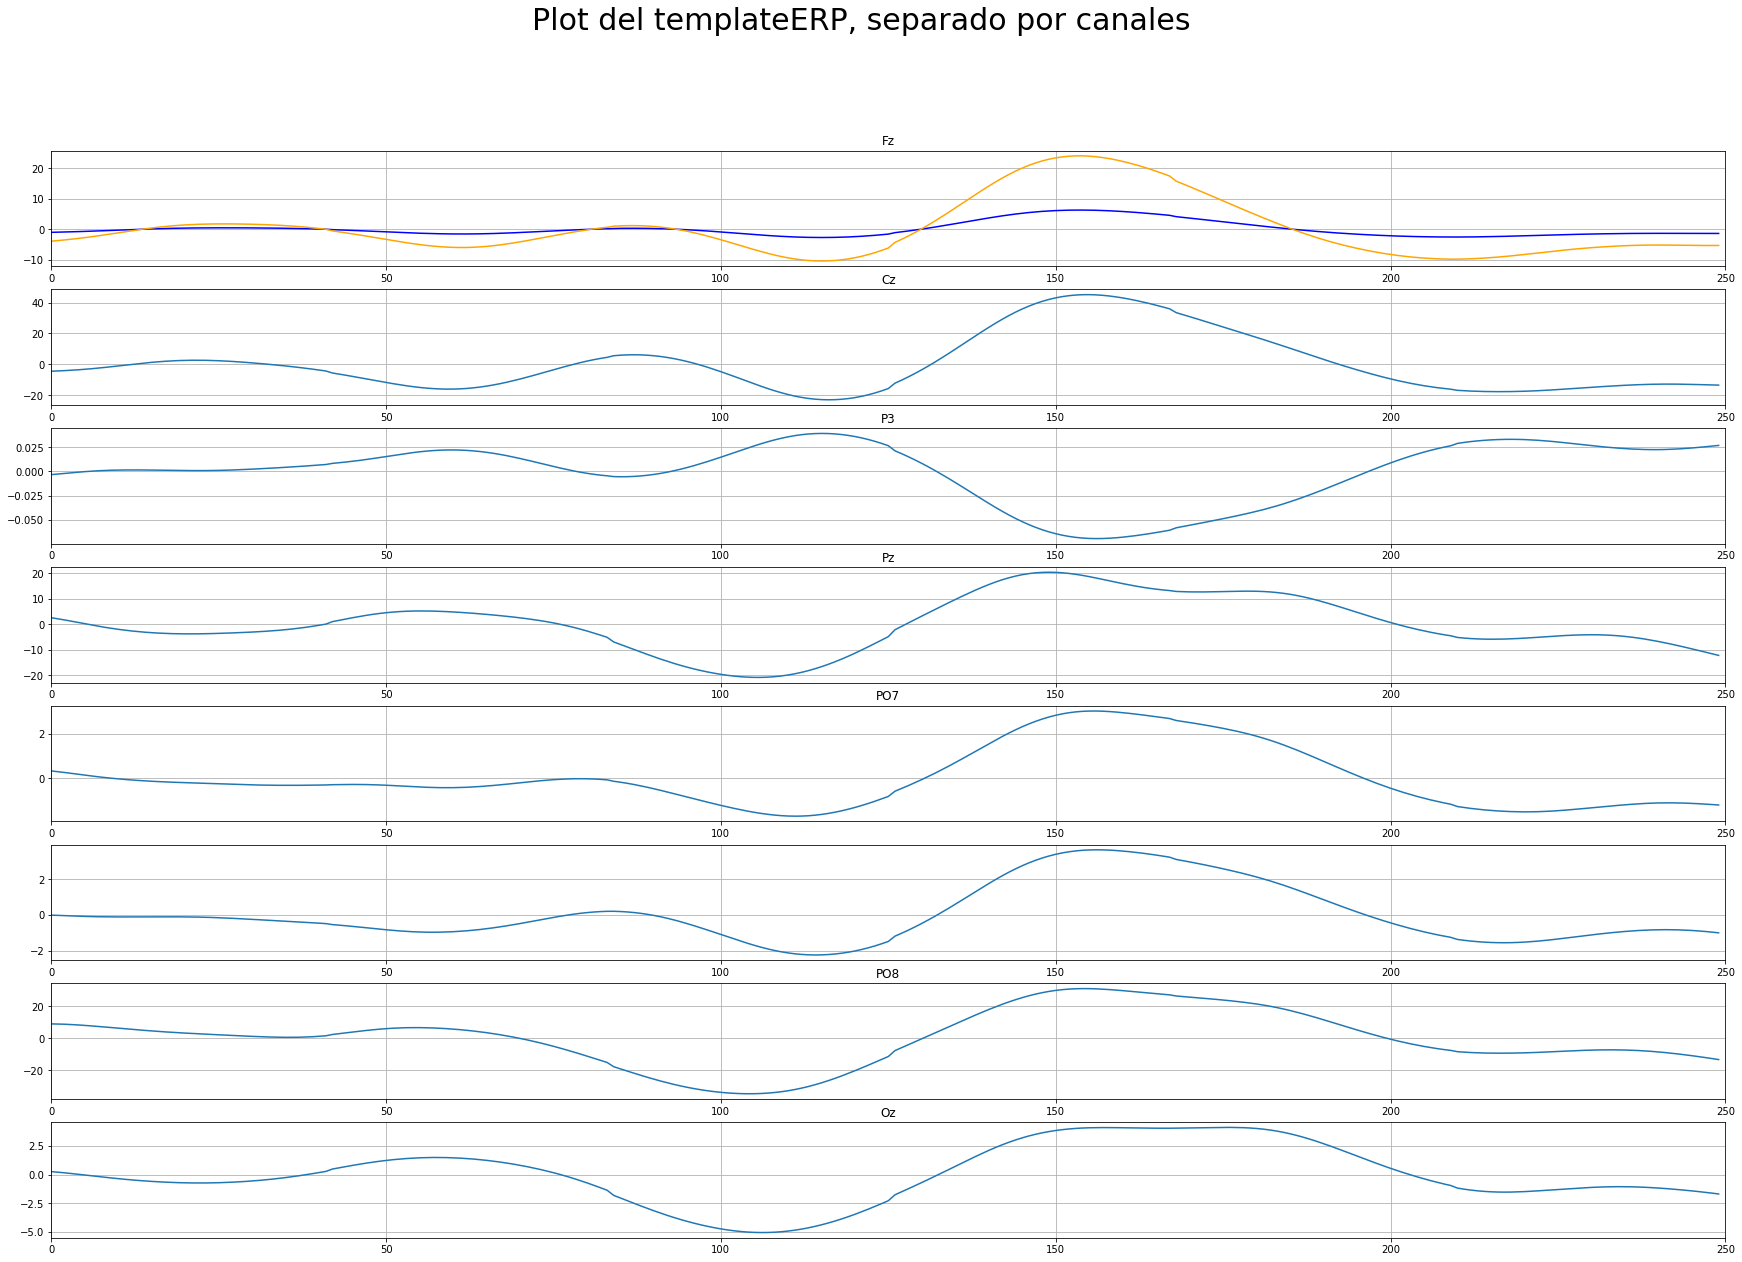

In [25]:
#-----------------------------------------------------------------------
# Plot del templateERP completo
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,7):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])     
axes.set_title('templateERP original'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/ERPTemplate.jpg")
#plt.axis((0,250,-6,8))  
plt.xlim([0,250]) #plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP modificado
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,7):
    plt.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate[i], color[i])     
axes.set_title('templateERP modificado en amplitud\nRango entre (0.5*v_minERP) y (1.5*v_maxERP)'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/ERPTemplate.jpg")
#plt.axis((0,250,-6,8))  
plt.xlim([0,250]) #plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP, separado por canales
#-----------------------------------------------------------------------
xlim_general=([0,250])
ylim_general=([-6,8])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(30,20))
fig.suptitle("Plot del templateERP, separado por canales", fontsize=30)

ax0.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,0], label='0', color='blue') 
ax0.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,0], label='0',  color='orange') 
ax0.set_xlim(xlim_general), '''ax0.set_ylim(ylim_general)''', ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), '''ax1.set_ylim(ylim_general)''', ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), '''ax2.set_ylim(ylim_general)''', ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), '''ax3.set_ylim(ylim_general)''', ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), '''ax4.set_ylim(ylim_general)''', ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), '''ax5.set_ylim(ylim_general)''', ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), '''ax6.set_ylim(ylim_general)''', ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), '''ax7.set_ylim(ylim_general)''', ax7.set_title(ch_names[7]), ax7.grid()

plt.show()

In [ ]:
'''
#-----------------------------------------------------------------------
# Plot de la señal drogada completa.
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('P300, "sujeto25". Señal drogada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.grid(), plt.show()
'''
#-----------------------------------------------------------------------
# Plot de la señal drogada: zoom hasta un P300
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Plot de la señal drogada: zoom hasta un P300'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.axis((117800,118050,-100,150))   
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot de la señal drogada, separada por canales
#-----------------------------------------------------------------------
xlim_general=([117800,118050])
ylim_general=([-100,150])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(30,20))
fig.suptitle("Plot de la señal drogada, separada por canales", fontsize=30)

ax0.plot(df_signal['sample'], df_signal.iloc[:,0], label='0') 
ax0.set_xlim(xlim_general), ax0.set_ylim(ylim_general), ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_signal['sample'], df_signal.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), ax1.set_ylim(ylim_general), ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_signal['sample'], df_signal.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), ax2.set_ylim(ylim_general), ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_signal['sample'], df_signal.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), ax3.set_ylim(ylim_general), ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_signal['sample'], df_signal.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), ax4.set_ylim(ylim_general), ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_signal['sample'], df_signal.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), ax5.set_ylim(ylim_general), ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_signal['sample'], df_signal.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), ax6.set_ylim(ylim_general), ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_signal['sample'], df_signal.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), ax7.set_ylim(ylim_general), ax7.set_title(ch_names[7]), ax7.grid()

plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP completo
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,7):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])
axes.set_title('Plot del templateERP completo'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/ERPTemplate.jpg")
plt.axis((0,250,-6,8))  #plt.xlim([0,100]), plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP, separado por canales
#-----------------------------------------------------------------------
xlim_general=([0,250])
ylim_general=([-6,8])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(30,20))
fig.suptitle("Plot del templateERP, separado por canales", fontsize=30)

ax0.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,0], label='0') 
ax0.set_xlim(xlim_general), ax0.set_ylim(ylim_general), ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), ax1.set_ylim(ylim_general), ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), ax2.set_ylim(ylim_general), ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), ax3.set_ylim(ylim_general), ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), ax4.set_ylim(ylim_general), ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), ax5.set_ylim(ylim_general), ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), ax6.set_ylim(ylim_general), ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), ax7.set_ylim(ylim_general), ax7.set_title(ch_names[7]), ax7.grid()

plt.show()


'''
plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[0])
axes.set_title('Señal t_flash[0]: Incremental'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Señal t_flash[3] completa'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Zoom señal t_flash[3]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([0,100]), plt.ylim([0.9,2.1])
plt.grid(), plt.show()
'''

En la siguientes gráficas modifico el erptemplate1 multiplicándolo por 50 dentro de la función DrugSignal.  
El objetivo es visualizar en dónde afecta la señal.    

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])                                                           
axes.set_title('DrugSignal p300subject25[data][0][0][0] + ERPTemplate amplificado'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([8550,8950]), plt.ylim([-600,800])
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100_zoom.jpg")
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])              
axes.set_title('Señal p300subject25[data][0][0][0] drogada con el ERPTemplate'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal2.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([228000,236000]), plt.ylim([-800,1000])
plt.savefig("./a_images/DrguSignal2_zoom.jpg")
plt.grid(), plt.show()